<a href="https://colab.research.google.com/github/soheilpaper/-tft-2.4-ili9341-STM32/blob/master/RAG's/RAG-from-Scratch/Llama3_RAG_for_web_url.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **See full article on [Meduim](https://medium.com/@tharindumadhusanka99/llama3-rag-on-google-colab-73c43aa53281)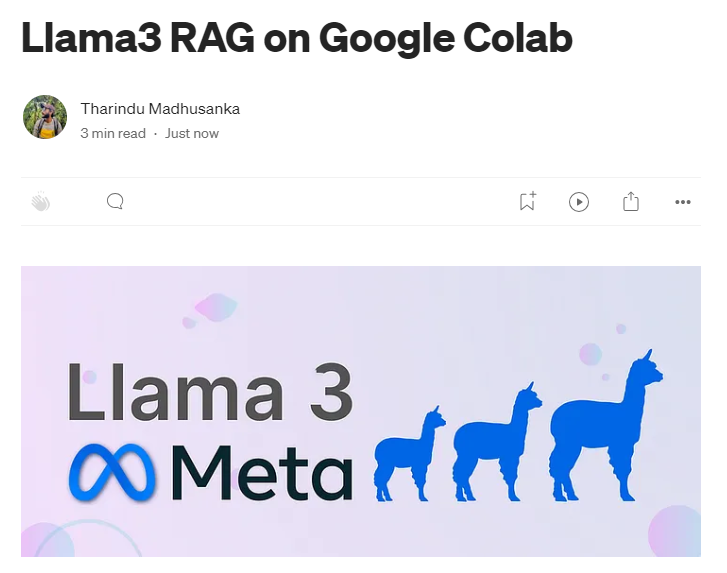**

In [ ]:
!pip install colab-xterm
%load_ext colabxterm

In [ ]:
# type these codes in below terminal after run the cell (%xterm)
! curl -fsSL https://ollama.com/install.sh | sh
#! ollama serve & ollama pull llama3 & ollama pull nomic-embed-text

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################    98.4%

In [17]:
import subprocess
import threading
import time

def run_ollama_serve():
    # Start ollama serve as a background process
    # stdout and stderr are redirected to avoid cluttering output
    subprocess.Popen(["ollama", "serve"], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

# Start the server thread
thread = threading.Thread(target=run_ollama_serve)
thread.start()

print("Starting ollama serve in background...")
time.sleep(5)  # Wait for the server to initialize

# Pull the models
print("Pulling llama3 model...")
pull_llama3 = subprocess.run(["ollama", "pull", "llama3"], capture_output=True, text=True)
print(pull_llama3.stdout)

print("Pulling nomic-embed-text model...")
pull_nomic = subprocess.run(["ollama", "pull", "nomic-embed-text"], capture_output=True, text=True)
print(pull_nomic.stdout)

print("All done! Ollama server is running in the background and models are pulled.")

Starting ollama serve in background...
Pulling llama3 model...

Pulling nomic-embed-text model...

All done! Ollama server is running in the background and models are pulled.


In [ ]:

#or run in xterm ...
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!pip  install langchain
!pip  install langchain-core
!pip  install langchain-community

In [ ]:
from langchain_community.llms import Ollama
llm = Ollama(model = "llama3")
llm.invoke("what is the Meaning of life")

KeyboardInterrupt: 

In [ ]:
!pip install ollama langchain beautifulsoup4 chromadb gradio

In [ ]:
!pip install chromadb

In [19]:

'''
import gradio as gr
import ollama
from bs4 import BeautifulSoup as bs
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings

# Load the data from the web URL
url = 'https://en.wikipedia.org/wiki/Ohiya'
loader = WebBaseLoader(url)
docs = loader.load()

# Split the loaded documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

# Create Ollama embeddings and vector store
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

# Define the function to call the Ollama Llama3 model
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG setup
retriever = vectorstore.as_retriever()

def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return ollama_llm(question, formatted_context)

# Define the Gradio interface
def get_important_facts(question):
    return rag_chain(question)

# Create a Gradio app interface
iface = gr.Interface(
  fn=get_important_facts,
  inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
  outputs="text",
  title="RAG with Llama3",
  description="Ask questions about the proveded context",
)

# Launch the Gradio app
iface.launch()
'''

'\nimport gradio as gr\nimport ollama\nfrom bs4 import BeautifulSoup as bs\nfrom langchain.text_splitter import RecursiveCharacterTextSplitter\nfrom langchain_community.document_loaders import WebBaseLoader\nfrom langchain_community.vectorstores import Chroma\nfrom langchain_community.embeddings import OllamaEmbeddings\n\n# Load the data from the web URL\nurl = \'https://en.wikipedia.org/wiki/Ohiya\'\nloader = WebBaseLoader(url)\ndocs = loader.load()\n\n# Split the loaded documents into chunks\ntext_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)\nsplits = text_splitter.split_documents(docs)\n\n# Create Ollama embeddings and vector store\nembeddings = OllamaEmbeddings(model="nomic-embed-text")\nvectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)\n\n# Define the function to call the Ollama Llama3 model\ndef ollama_llm(question, context):\n    formatted_prompt = f"Question: {question}\n\nContext: {context}"\n    response = ollama.chat

In [18]:

'''
import pandas as pd
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
import ollama
import gradio as gr

# Load Excel data
df = pd.read_excel("http://213.188.192.134/files/iran-oil_iran_oil.xlsx")
texts = df['Content'].dropna().tolist()  # Adjust column name accordingly
docs = [Document(page_content=text) for text in texts]

# Split documents
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

# Create embeddings and vectorstore
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

# Define retrieval and LLM interaction
retriever = vectorstore.as_retriever()

def ollama_llm(question, context):
    prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3', messages=[{'role': 'user', 'content': prompt}])
    return response['message']['content']

def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    context = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return ollama_llm(question, context)

def get_important_facts(question):
    return rag_chain(question)

iface = gr.Interface(
    fn=get_important_facts,
    inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
    outputs="text",
    title="RAG with Llama3 on Excel Data",
    description="Ask questions about the provided Excel content",
)

iface.launch()
'''

'\nimport pandas as pd\nfrom langchain.schema import Document\nfrom langchain.text_splitter import RecursiveCharacterTextSplitter\nfrom langchain_community.vectorstores import Chroma\nfrom langchain_community.embeddings import OllamaEmbeddings\nimport ollama\nimport gradio as gr\n\n# Load Excel data\ndf = pd.read_excel("http://213.188.192.134/files/iran-oil_iran_oil.xlsx")\ntexts = df[\'Content\'].dropna().tolist()  # Adjust column name accordingly\ndocs = [Document(page_content=text) for text in texts]\n\n# Split documents\ntext_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)\nsplits = text_splitter.split_documents(docs)\n\n# Create embeddings and vectorstore\nembeddings = OllamaEmbeddings(model="nomic-embed-text")\nvectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)\n\n# Define retrieval and LLM interaction\nretriever = vectorstore.as_retriever()\n\ndef ollama_llm(question, context):\n    prompt = f"Question: {question}\n\nContext

In [ ]:
!pip install gradio langchain langchain-ollama chromadb beautifulsoup4

In [ ]:
!pip install chromadb==0.4.14

In [ ]:
# Install required packages
# Uninstall old versions (optional)
!pip uninstall -y faiss faiss-cpu faiss-gpu

!pip install --upgrade gradio #==3.13.0
!pip install langchain langchain-ollama faiss-cpu beautifulsoup4 ollama
!pip install langchain-community unstructured openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 33.4 MB/s eta 0:00:00


In [ ]:
# Install Ollama CLI
!curl -fsSL https://ollama.com/install.sh | sh

In [15]:



# Start Ollama server in background with nohup
!nohup ollama serve > ollama.log 2>&1 &

# Pull models (only need to do once)
!ollama pull llama3
!ollama pull nomic-embed-text

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling 6a0746a1ec1a: 100% ▕▏ 4.7 GB                         
pulling 4fa551d4f938: 100% ▕▏  12 KB                         
pulling 8ab4849b038c: 100% ▕▏  254 B                         
pulling 577073ffcc6c: 100% ▕▏  110 B                         
pulling 3f8eb4da87fa: 100% ▕▏  485 B                         
verifying sha256 digest 
writing manifest 
success 
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling 970aa74c0a90: 100% ▕▏ 274 MB                         
pulling c71d239df917: 100% ▕▏  11 KB                         
pulling ce4a164fc046: 100% ▕▏   17 B                         
pulling 31df23ea7daa: 100% ▕▏  420 B                         
verifying sha256 digest 
writing manifest 
success 


In [6]:

'''

import os
import time
import gradio as gr
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import WebBaseLoader
from langchain.vectorstores import FAISS
from langchain_ollama import OllamaEmbeddings

# Wait for Ollama server to start (adjust sleep time if needed)
print("Waiting for Ollama server to start...")
time.sleep(1)  # Increase if server is slow to start

# Set USER_AGENT to avoid scraping warnings
os.environ["USER_AGENT"] = "MyRAGApp/1.0 (+https://example.com)"

# Load documents from Wikipedia
url = 'https://en.wikipedia.org/wiki/Ohiya'
loader = WebBaseLoader(url)
docs = loader.load()

# Split documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

# Create Ollama embeddings and FAISS vector store
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = FAISS.from_documents(splits, embeddings)

# Function to query Ollama Llama3 with context
def ollama_llm(question, context):
    prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3', messages=[{'role': 'user', 'content': prompt}])
    return response['message']['content']

retriever = vectorstore.as_retriever()

def rag_chain(question):
    docs = retriever.get_relevant_documents(question)
    context = "\n\n".join(doc.page_content for doc in docs)
    return ollama_llm(question, context)

def get_important_facts(question):
    if not question.strip():
        return "Please enter a valid question."
    return rag_chain(question)

iface = gr.Interface(
    fn=get_important_facts,
    inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
    outputs="text",
    title="RAG with Llama3",
    description="Ask questions about the Wikipedia page on Ohiya.",
)

iface.launch(share=True, debug=True)
'''

Waiting for Ollama server to start...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5f2d927169e67e6632.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5f2d927169e67e6632.gradio.live


In [11]:
#!wget 'http://213.188.192.134/files/iran-oil_iran_oil.xlsx'
!wget 'https://huggingface.co/spaces/sosa123454321/Exhibition-connector-rag1/resolve/main/iran-oil_iran-oil_iran%20oil.xlsx'

--2025-05-09 16:00:45--  http://213.188.192.134/files/iran-oil_iran_oil.xlsx
Connecting to 213.188.192.134:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209688 (205K) [application/octet-stream]
Saving to: ‘iran-oil_iran_oil.xlsx’

iran-oil_iran_oil.x 100%[===================>] 204.77K  1001KB/s    in 0.2s    

2025-05-09 16:00:45 (1001 KB/s) - ‘iran-oil_iran_oil.xlsx’ saved [209688/209688]



In [16]:
import os
import time
import gradio as gr
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import WebBaseLoader
from langchain_community.document_loaders import UnstructuredExcelLoader
from langchain.vectorstores import FAISS
from langchain_ollama import OllamaEmbeddings

# Wait for Ollama server to start (adjust if needed)
print("Waiting for Ollama server to start...")
time.sleep(1)

# Set USER_AGENT to avoid scraping warnings
os.environ["USER_AGENT"] = "MyRAGApp/1.0 (+https://example.com)"

# Load Wikipedia page documents
wiki_url = 'https://en.wikipedia.org/wiki/Ohiya'
wiki_loader = WebBaseLoader(wiki_url)
wiki_docs = wiki_loader.load()

# Load Excel file documents
excel_url = 'https://huggingface.co/spaces/sosa123454321/Exhibition-connector-rag1/resolve/main/iran-oil_iran-oil_iran%20oil.xlsx'
excel_loader = UnstructuredExcelLoader(excel_url, mode="elements")
excel_docs = excel_loader.load()

# Combine documents from both sources
all_docs = wiki_docs + excel_docs

# Split documents into chunks for embedding
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(all_docs)

# Create embeddings and vector store
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = FAISS.from_documents(splits, embeddings)

# Define Ollama Llama3 query function
def ollama_llm(question, context):
    prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3', messages=[{'role': 'user', 'content': prompt}])
    return response['message']['content']

# Retriever from vector store
retriever = vectorstore.as_retriever()

# RAG chain function
def rag_chain(question):
    docs = retriever.get_relevant_documents(question)
    context = "\n\n".join(doc.page_content for doc in docs)
    return ollama_llm(question, context)

# Gradio interface function
def get_important_facts(question):
    if not question.strip():
        return "Please enter a valid question."
    return rag_chain(question)

# Create Gradio interface
iface = gr.Interface(
    fn=get_important_facts,
    inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
    outputs="text",
    title="RAG with Llama3 and Excel Data",
    description="Ask questions about the Wikipedia page on Ohiya and the Iran oil Excel data.",
)

# Launch Gradio app with share=True for Colab
if __name__ == "__main__":
    iface.launch(share=True, debug=True)

Waiting for Ollama server to start...


KeyboardInterrupt: 